In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

In [9]:
df=pd.read_csv('train.csv')
print(f"Formato do dataframe: {df.shape}\nColunas = {df.columns}")

Formato do dataframe: (891, 12)
Colunas = Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df['Survived'].drop_duplicates()

0    0
1    1
Name: Survived, dtype: int64

In [15]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
x = df.drop(columns=['Survived'],axis=1)
y = df['Survived']

In [21]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(f"Shape x treinamento:{x_train.shape}\nShape x test:{x_test.shape}")

Shape x treinamento:(712, 11)
Shape x test:(179, 11)


In [24]:
x_train.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
x_test.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
print(f"Shape x treinamento:{x_train.shape}\nShape x test:{x_test.shape}")

Shape x treinamento:(712, 7)
Shape x test:(179, 7)


<ipython-input-24-d29e1069ef17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
<ipython-input-24-d29e1069ef17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)


In [26]:
pd.isna(x_test).sum().to_frame("Valor Vazio")

,Valor Vazio
Pclass,0
Sex,0
Age,40
SibSp,0
Parch,0
Fare,0
Embarked,1


In [27]:
x_train.groupby('Age').size()

Age
0.42     1
0.75     1
0.83     2
0.92     1
1.00     5
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Length: 86, dtype: int64

In [28]:
#x_train.loc[x_train['Age'] == 0].fillna(x_train.loc[x_train['Age'] == 0].mean(),inplace = True)
#x_train.loc[x_train['Age'] == 1].fillna(x_train.loc[x_train['Age'] == 1].mean(),inplace = True)

In [29]:
x_train.groupby('Age').agg({'Age':np.mean, 'Age':np.size})

,Age
Age,
0.42,1
0.75,1
0.83,2
0.92,1
1.00,5
...,...
70.00,2
70.50,1
71.00,2


In [35]:
x_test['Age'].fillna(x_train['Age'].mean(),inplace=True)
x_train['Age'].fillna(x_train['Age'].mean(),inplace=True)

x_train['Embarked'].fillna(x_train['Embarked'].mode()[0],inplace=True)
x_test['Embarked'].fillna(x_train['Embarked'].mode()[0],inplace=True)

<ipython-input-35-9581645bae22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Age'].fillna(x_train['Age'].mean(),inplace=True)
<ipython-input-35-9581645bae22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Age'].fillna(x_train['Age'].mean(),inplace=True)
<ipython-input-35-9581645bae22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Embarked'].fillna(x_train['Embarked'].mode()[0],inplace=True)
<ipython-i

In [37]:
pd.isna(x_test).sum().to_frame("Valor Vazio")

,Valor Vazio
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [38]:
x_train[['Age','Fare']] = MinMaxScaler().fit_transform(x_train[['Age','Fare']])
x_test[['Age','Fare']] = MinMaxScaler().fit_transform(x_test[['Age','Fare']])

<ipython-input-38-eaabd1934d64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[['Age','Fare']] = MinMaxScaler().fit_transform(x_train[['Age','Fare']])
<ipython-input-38-eaabd1934d64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[['Age','Fare']] = MinMaxScaler().fit_transform(x_test[['Age','Fare']])


In [39]:
x_train = pd.get_dummies(x_train, columns=['Pclass','Sex','SibSp','Parch','Embarked'])
x_test = pd.get_dummies(x_test, columns=['Pclass','Sex','SibSp','Parch','Embarked'])
x_train,x_test = x_train.align(x_test,join='inner',axis=1)

In [49]:
print(f"Shape de treino = {x_train.shape}\nShape de teste = {x_test.shape}")

Shape de treino = (712, 22)
Shape de teste = (179, 22)


In [45]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 401 to 114
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         179 non-null    float64
 1   Fare        179 non-null    float64
 2   Pclass_1    179 non-null    uint8  
 3   Pclass_2    179 non-null    uint8  
 4   Pclass_3    179 non-null    uint8  
 5   Sex_female  179 non-null    uint8  
 6   Sex_male    179 non-null    uint8  
 7   SibSp_0     179 non-null    uint8  
 8   SibSp_1     179 non-null    uint8  
 9   SibSp_2     179 non-null    uint8  
 10  SibSp_3     179 non-null    uint8  
 11  SibSp_4     179 non-null    uint8  
 12  SibSp_5     179 non-null    uint8  
 13  SibSp_8     179 non-null    uint8  
 14  Parch_0     179 non-null    uint8  
 15  Parch_1     179 non-null    uint8  
 16  Parch_2     179 non-null    uint8  
 17  Parch_4     179 non-null    uint8  
 18  Parch_5     179 non-null    uint8  
 19  Embarked_C  179 non-null   

In [51]:
LR = LogisticRegression(solver='lbfgs',max_iter=10000).fit(x_train,y_train)
LDA = LinearDiscriminantAnalysis().fit(x_train,y_train)
DT = DecisionTreeClassifier().fit(x_train,y_train)
KN = KNeighborsClassifier().fit(x_train,y_train)
SVM = SVC().fit(x_train,y_train)
RF = RandomForestClassifier().fit(x_train,y_train)

In [52]:
metricas_treino = {
    'Accuracy':[LR.score(x_train,y_train),
               LDA.score(x_train,y_train),
               DT.score(x_train,y_train),
               KN.score(x_train,y_train),
               SVM.score(x_train,y_train),
               RF.score(x_train,y_train)],
    'Precision':[precision_score(y_train,LR.predict(x_train)),
                precision_score(y_train,LDA.predict(x_train)),
                precision_score(y_train,DT.predict(x_train)),
                precision_score(y_train,KN.predict(x_train)),
                precision_score(y_train,SVM.predict(x_train)),
                precision_score(y_train,RF.predict(x_train))],
    'Recall':[recall_score(y_train,LR.predict(x_train)),
             recall_score(y_train,LDA.predict(x_train)),
             recall_score(y_train,DT.predict(x_train)),
             recall_score(y_train,KN.predict(x_train)),
             recall_score(y_train,SVM.predict(x_train)),
             recall_score(y_train,RF.predict(x_train))]
}
dados = pd.DataFrame(metricas_treino,
                     columns=['Accuracy','Precision','Recall'],
                    index=['LR','LDA','DT','KN','SVM','RF'])
dados

,Accuracy,Precision,Recall
LR,0.810393,0.779167,0.695167
LDA,0.807584,0.784483,0.676580
DT,0.984551,0.996154,0.962825
KN,0.858146,0.862069,0.743494
SVM,0.827247,0.910112,0.602230
RF,0.984551,0.988636,0.970260


In [54]:
metricas_teste = {
    'Accuracy':[LR.score(x_test,y_test),
               LDA.score(x_test,y_test),
               DT.score(x_test,y_test),
               KN.score(x_test,y_test),
               SVM.score(x_test,y_test),
               RF.score(x_test,y_test)],
    'Precision':[precision_score(y_test,LR.predict(x_test)),
                precision_score(y_test,LDA.predict(x_test)),
                precision_score(y_test,DT.predict(x_test)),
                precision_score(y_test,KN.predict(x_test)),
                precision_score(y_test,SVM.predict(x_test)),
                precision_score(y_test,RF.predict(x_test))],
    'Recall':[recall_score(y_test,LR.predict(x_test)),
             recall_score(y_test,LDA.predict(x_test)),
             recall_score(y_test,DT.predict(x_test)),
             recall_score(y_test,KN.predict(x_test)),
             recall_score(y_test,SVM.predict(x_test)),
             recall_score(y_test,RF.predict(x_test))]
}
dados = pd.DataFrame(metricas_treino,
                     columns=['Accuracy','Precision','Recall'],
                    index=['LR','LDA','DT','KN','SVM','RF'])
dados

,Accuracy,Precision,Recall
LR,0.810393,0.779167,0.695167
LDA,0.807584,0.784483,0.676580
DT,0.984551,0.996154,0.962825
KN,0.858146,0.862069,0.743494
SVM,0.827247,0.910112,0.602230
RF,0.984551,0.988636,0.970260


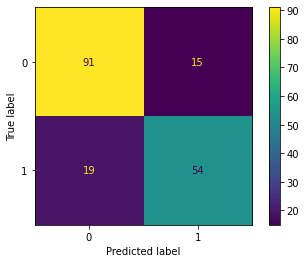

In [55]:
plot_confusion_matrix(RF,x_test,y_test)
plt.show()

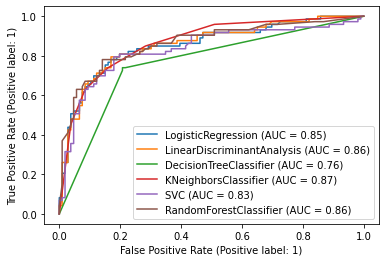

In [56]:
plot_roc_curve(LR,x_test,y_test,ax=plt.gca())
plot_roc_curve(LDA,x_test,y_test,ax=plt.gca())
plot_roc_curve(DT,x_test,y_test,ax=plt.gca())
plot_roc_curve(KN,x_test,y_test,ax=plt.gca())
plot_roc_curve(SVM,x_test,y_test,ax=plt.gca())
plot_roc_curve(RF,x_test,y_test,ax=plt.gca())

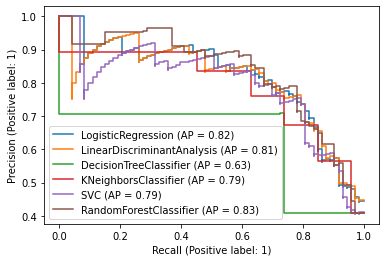

In [57]:
plot_precision_recall_curve(LR,x_test,y_test,ax=plt.gca())
plot_precision_recall_curve(LDA,x_test,y_test,ax=plt.gca())
plot_precision_recall_curve(DT,x_test,y_test,ax=plt.gca())
plot_precision_recall_curve(KN,x_test,y_test,ax=plt.gca())
plot_precision_recall_curve(SVM,x_test,y_test,ax=plt.gca())
plot_precision_recall_curve(RF,x_test,y_test,ax=plt.gca())